`env:cv2`

In [4]:
import cv2, time, pandas
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [205]:
label = 'hallway'

root_path = os.getcwd()
cache_path = os.path.join(root_path, 'cache')
captured_frames_path = os.path.join(cache_path, 'captured_frames')
source_path = os.path.join(captured_frames_path, label)
source_list = os.listdir(source_path)

# Use first 100 images
selected_source_list = source_list[:25000]

# # Benchmark (for testing)
# # (tukang sampah)
# benchmark_path = os.path.join(source_path, '1671427000.0.jpg')
# benchmark_path = os.path.join(source_path, '1671431147.0.jpg')
# benchmark_path = os.path.join(source_path, '1671431208.0.jpg')
# img_benchmark = cv2.imread(benchmark_path, cv2.IMREAD_GRAYSCALE)
# img_benchmark_blurred = cv2.GaussianBlur(img_benchmark, (21,21), 0)

# # Similar with background (?) at least visually
# similar_path = os.path.join(source_path, '1671427245.0.jpg')
# img_similar = cv2.imread(similar_path, cv2.IMREAD_GRAYSCALE)
# img_similar_blurred = cv2.GaussianBlur(img_similar, (21,21), 0)

high_value_counts = []

for i, filename in enumerate(selected_source_list):
    moving_avg_path = os.path.join(source_path, filename)
    img = cv2.imread(moving_avg_path, cv2.IMREAD_GRAYSCALE)
    img_blurred = cv2.GaussianBlur(img, (35,35),0)
    if i == 0:
        average_value = np.float32(img_blurred)
    
    cv2.accumulateWeighted(img_blurred, average_value, 0.25)
    
    running_average = cv2.convertScaleAbs(average_value)
    diff = cv2.absdiff(running_average, img_blurred)
    thresh = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=2)
    resized = cv2.resize(thresh, (0,0), fx=0.2, fy=0.2)
    resized_reshaped = resized.reshape(resized.shape[0]*resized.shape[1])
    high_value_count = np.histogram(resized_reshaped, bins=5)[0][4]
    
    high_value_counts.append(high_value_count)
    
    # Create checkpoint of image running_average every x times. Store with timestamp
    # Restart from that point.

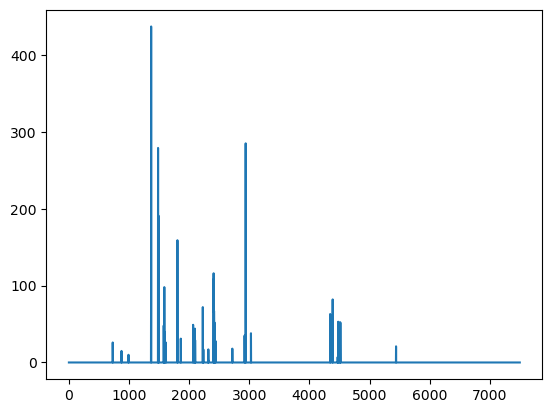

In [208]:
plt.plot(high_value_counts[17500:])

In [209]:
for i, (fn, val) in enumerate(zip(selected_source_list[17500:], high_value_counts[17500:])):
    if val > 50:
        print(f'{i} {fn} {val}')

1366 1671460416.0.jpg 87
1367 1671460417.0.jpg 94
1368 1671460419.0.jpg 437
1482 1671460592.0.jpg 160
1483 1671460593.0.jpg 279
1489 1671460602.0.jpg 191
1494 1671460610.0.jpg 174
1495 1671460611.0.jpg 84
1587 1671460770.0.jpg 98
1805 1671461116.0.jpg 159
2227 1671461774.0.jpg 72
2405 1671462064.0.jpg 108
2406 1671462066.0.jpg 66
2407 1671462067.0.jpg 116
2413 1671462076.0.jpg 54
2414 1671462078.0.jpg 67
2415 1671462079.0.jpg 57
2421 1671462088.0.jpg 52
2940 1671462908.0.jpg 285
2941 1671462909.0.jpg 57
4345 1671465140.0.jpg 63
4387 1671465203.0.jpg 82
4479 1671465359.0.jpg 53
4507 1671465402.0.jpg 52
4515 1671465414.0.jpg 52


In [140]:
similar_diff = cv2.absdiff(running_average, img_similar_blurred)
benchmark_dirr = cv2.absdiff(running_average, img_benchmark_blurred)

similar_thresh = cv2.threshold(similar_diff, 100, 255, cv2.THRESH_BINARY)[1]
similar_thresh = cv2.dilate(similar_thresh, None, iterations=2)
benchmark_thresh = cv2.threshold(benchmark_dirr, 100, 255, cv2.THRESH_BINARY)[1]
benchmark_thresh = cv2.dilate(benchmark_thresh, None, iterations=2)

similar_thresh_rz = cv2.resize(similar_thresh, (0,0), fx=0.2, fy=0.2)
benchmark_thresh_rz = cv2.resize(benchmark_thresh, (0,0), fx=0.2, fy=0.2)

high_value_count_similar = np.histogram(benchmark_thresh_rz.reshape(benchmark_thresh_rz.shape[0]*benchmark_thresh_rz.shape[1]), bins=5)[0][4]
high_value_count_benchmark = np.histogram(similar_thresh_rz.reshape(similar_thresh_rz.shape[0]*similar_thresh_rz.shape[1]), bins=5)[0][4]

In [141]:
similar_thresh_rz.shape

(144, 256)

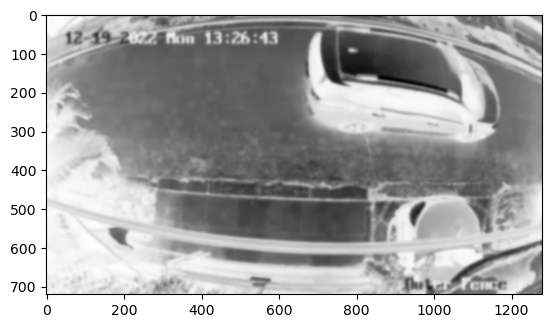

In [142]:
plt.imshow(img_benchmark_blurred, cmap='Greys')

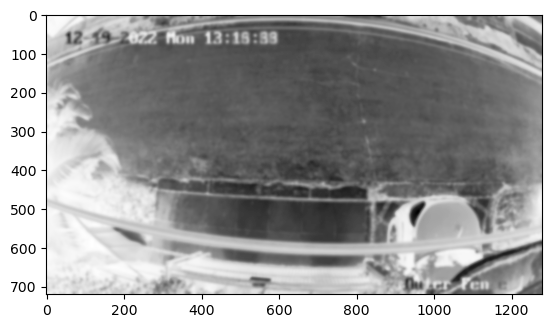

In [143]:
plt.imshow(running_average, cmap='Greys')

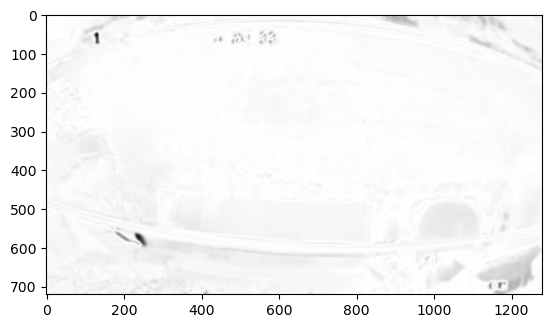

In [144]:
plt.imshow(cv2.absdiff(running_average, img_similar_blurred), cmap='Greys')

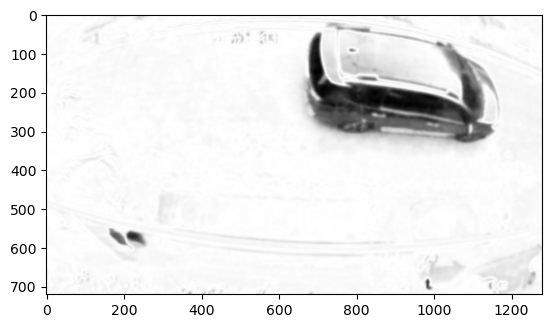

In [145]:
plt.imshow(cv2.absdiff(running_average, img_benchmark_blurred), cmap='Greys')

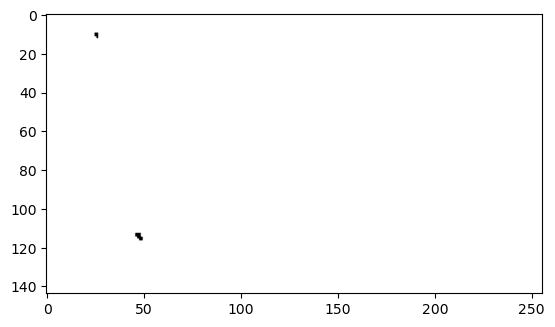

In [146]:
plt.imshow(similar_thresh_rz, cmap='Greys')

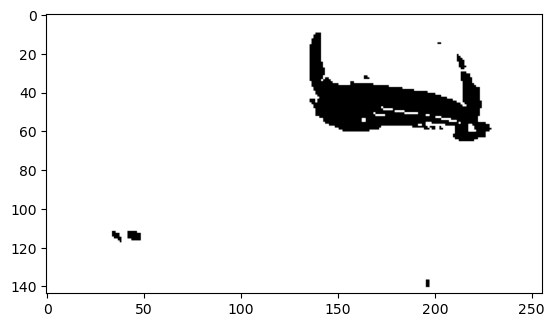

In [147]:
plt.imshow(benchmark_thresh_rz, cmap='Greys')

(array([[144.,   0.,   0., ...,   0.,   0.,   0.],
        [144.,   0.,   0., ...,   0.,   0.,   0.],
        [144.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [144.,   0.,   0., ...,   0.,   0.,   0.],
        [144.,   0.,   0., ...,   0.,   0.,   0.],
        [144.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.,
        187., 204., 221., 238., 255.]),
 <a list of 256 BarContainer objects>)

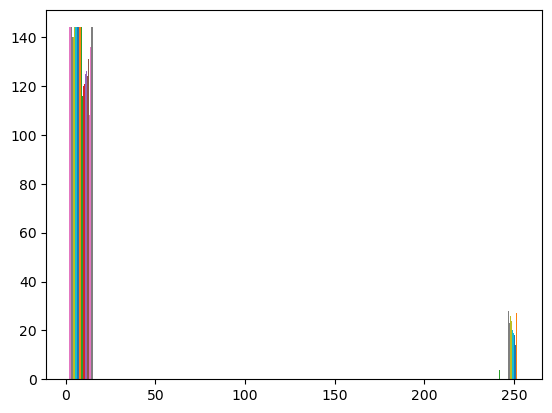

In [148]:
plt.hist(benchmark_thresh_rz, bins=15)

In [149]:
benchmark_thresh_rz.reshape(benchmark_thresh_rz.shape[0]*benchmark_thresh_rz.shape[1]).shape

(36864,)

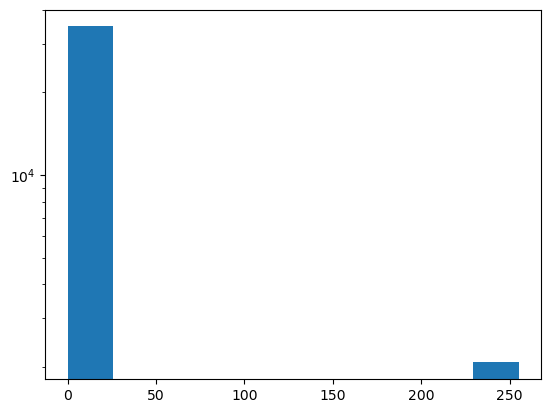

In [150]:
plt.hist(benchmark_thresh_rz.reshape(benchmark_thresh_rz.shape[0]*benchmark_thresh_rz.shape[1]), bins=10)
plt.yscale('log')

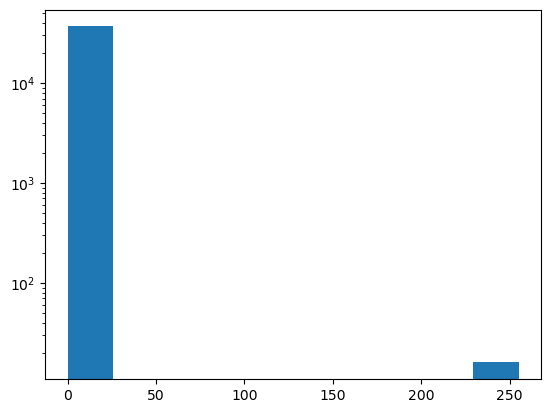

In [151]:
plt.hist(similar_thresh_rz.reshape(similar_thresh_rz.shape[0]*similar_thresh_rz.shape[1]), bins=10)
plt.yscale('log')

In [159]:
np.histogram(benchmark_thresh_rz.reshape(benchmark_thresh_rz.shape[0]*benchmark_thresh_rz.shape[1]), bins=5)[0][4]

2074

In [160]:
np.histogram(similar_thresh_rz.reshape(similar_thresh_rz.shape[0]*similar_thresh_rz.shape[1]), bins=5)[0][4]

16